### Loading the data

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
import os
import imghdr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [117]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)
print('Tensorflow Keras version:', tf.keras.__version__)
!nvcc --version
print("TensorFlow CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("TensorFlow cuDNN Version:", tf.sysconfig.get_build_info()['cudnn_version'])

TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1
Tensorflow Keras version: 3.8.0
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Oct_29_23:50:19_PDT_2024
Cuda compilation tools, release 12.6, V12.6.85
Build cuda_12.6.r12.6/compiler.35059454_0
TensorFlow CUDA Version: 12.5.1
TensorFlow cuDNN Version: 9


In [118]:
from tensorflow.python.client import device_lib

devices = device_lib.list_local_devices()
print("Detailed Device Information:")
for device in devices:
    print(f"Name: {device.name}, Type: {device.device_type}, Description: {device.physical_device_desc}")

Detailed Device Information:
Name: /device:CPU:0, Type: CPU, Description: 
Name: /device:GPU:0, Type: GPU, Description: device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


I0000 00:00:1744626431.590825   52374 gpu_device.cc:2022] Created device /device:GPU:0 with 9126 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [119]:
path = '/home/smayan/Desktop/Cricket-shot-classification/Data/data'

In [120]:
for img_class in os.listdir(path):
    print(img_class)

sweep
late_cut
straight
pull
defense
flick
hook
cover
square_cut
lofted


In [121]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(240, 240),
    shuffle=True,
    seed=420,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
)

Found 38799 files belonging to 10 classes.


In [122]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [123]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7679d1b7aa10>)

In [124]:
batch = data_iterator.next()

In [125]:
batch[0][1]

array([[[ 56.4     ,  66.46667 ,  77.4     ],
        [ 55.0875  ,  65.066666,  76.      ],
        [ 54.65625 ,  63.76389 ,  74.72569 ],
        ...,
        [193.63487 , 199.15987 , 198.43901 ],
        [192.08125 , 197.87917 , 198.72292 ],
        [201.4     , 207.06667 , 209.26666 ]],

       [[ 63.      ,  73.6     ,  83.8     ],
        [ 61.95    ,  71.63125 ,  81.83125 ],
        [ 59.09375 ,  67.78125 ,  78.40833 ],
        ...,
        [189.4542  , 193.93753 , 195.56877 ],
        [193.61874 , 196.525   , 199.81876 ],
        [203.2     , 204.4     , 209.4     ]],

       [[ 68.333336,  77.      ,  88.      ],
        [ 67.895836,  76.5625  ,  88.21875 ],
        [ 64.96181 ,  73.34375 ,  85.770836],
        ...,
        [187.23268 , 189.9931  , 194.13892 ],
        [186.92708 , 189.03125 , 194.26042 ],
        [189.33333 , 191.      , 196.66667 ]],

       ...,

       [[ 60.      ,  47.333344, 157.33331 ],
        [ 59.562508,  47.333363, 156.02083 ],
        [ 58.47919 ,  

In [126]:
batch[0].shape

(32, 240, 240, 3)

In [127]:
batch[1]

array([0, 6, 1, 9, 6, 6, 6, 6, 9, 2, 3, 4, 4, 3, 6, 3, 4, 3, 7, 0, 1, 2,
       1, 9, 8, 8, 0, 5, 6, 7, 1, 3], dtype=int32)

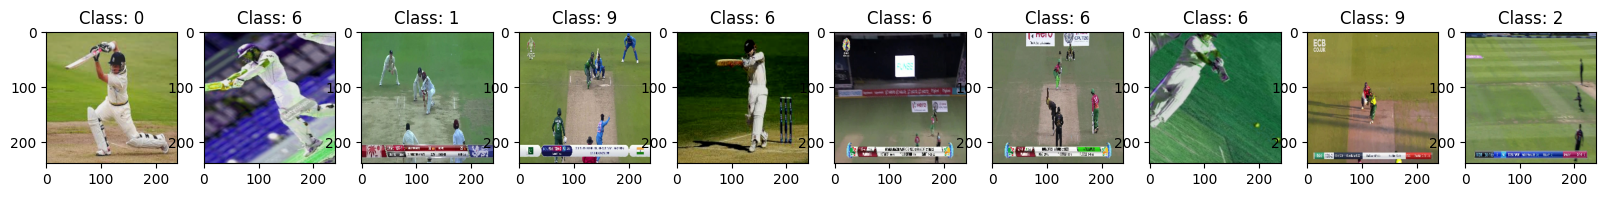

In [128]:
fig,ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f'Class: {batch[1][idx]}')

### Preprocessing the Data

In [129]:
data = data.map(lambda x,y: (x/255, y)) # Tensorflow tf.data.Dataset.map() function is used to apply a function to all the elements of a dataset.

In [130]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
scaled_batch = scaled_iterator.next()

In [132]:
scaled_batch[0][1]

array([[[0.50065356, 0.49673203, 0.55947715],
        [0.38431373, 0.3647059 , 0.43333334],
        [0.45163396, 0.4045751 , 0.4830065 ],
        ...,
        [0.31176183, 0.29150006, 0.45359412],
        [0.24901961, 0.19803922, 0.3882353 ],
        [0.64771324, 0.58888966, 0.6790858 ]],

       [[0.7183007 , 0.71437913, 0.7771242 ],
        [0.5686275 , 0.54901963, 0.61764705],
        [0.34183002, 0.2947712 , 0.37320256],
        ...,
        [0.23528263, 0.21044539, 0.35881492],
        [0.4254902 , 0.37254903, 0.57843137],
        [0.32287455, 0.27189416, 0.33921424]],

       [[0.7398693 , 0.7359477 , 0.7986928 ],
        [0.17058824, 0.1509804 , 0.21960784],
        [0.26928106, 0.22222222, 0.3006536 ],
        ...,
        [0.06601467, 0.03006664, 0.14902344],
        [0.21372549, 0.16078432, 0.36078432],
        [0.2477113 , 0.21568532, 0.2771226 ]],

       ...,

       [[0.46732026, 0.5228758 , 0.31111112],
        [0.46470588, 0.527451  , 0.28235295],
        [0.4627451 , 0

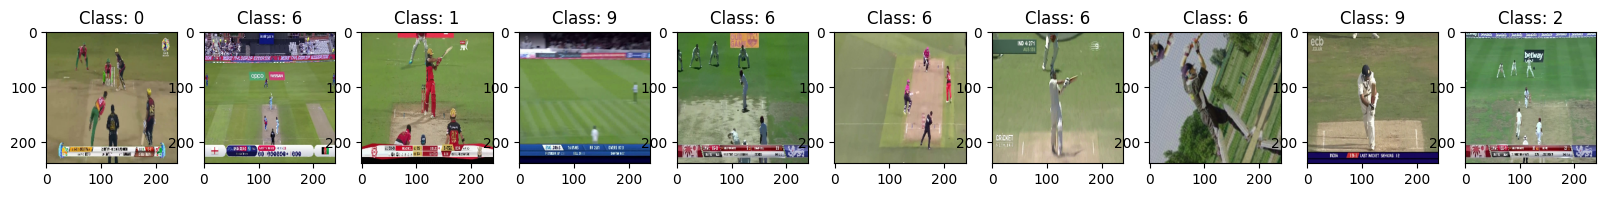

In [133]:
fig,ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(scaled_batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f'Class: {batch[1][idx]}')

In [134]:
len(data)

1213

In [135]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
val_size = int(len(data) * 0.1)+1

In [136]:
sum([train_size, test_size, val_size])

1213

In [137]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [138]:
IMG_SIZE = 240
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(img_class)

In [139]:
MODEL_URL = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet21k-b1-classification/1"

In [140]:
import tf_keras as keras

In [141]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print("Building model with: ", MODEL_URL)
    
    model = keras.Sequential([
        hub.KerasLayer(MODEL_URL, trainable=False),
        keras.layers.Dense(OUTPUT_SHAPE,
                              activation = 'softmax')
    ])

    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer  = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    model.build(INPUT_SHAPE)
    return model

In [142]:
model = create_model()

Building model with:  https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet21k-b1-classification/1


In [143]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 21843)             34912007  
                                                                 
 dense_6 (Dense)             (None, 6)                 131064    
                                                                 
Total params: 35043071 (133.68 MB)
Trainable params: 131064 (511.97 KB)
Non-trainable params: 34912007 (133.18 MB)
_________________________________________________________________


In [144]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [145]:
import datetime

In [146]:
def create_tensorboard_callback():
    logdir = os.path.join("/home/smayan/Desktop/Cricket-shot-classification/Logs/Tensorboard",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return keras.callbacks.TensorBoard(logdir)

In [151]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience = 15)

In [152]:
NUM_EPOCHS = 50

In [153]:
def train_model():
    model = create_model()

    tensorboard = create_tensorboard_callback()


    model.fit(x= train, 
              epochs= NUM_EPOCHS,
              validation_data= val,
              callbacks = [tensorboard, early_stopping])
    
    return model

In [154]:
model = train_model()

Building model with:  https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet21k-b1-classification/1
Epoch 1/50
847/849 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1163

2025-04-14 16:00:13.570725: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 22118656 bytes after encountering the first element of size 22118656 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


849/849 [==============================] - 26s 27ms/step - loss: nan - accuracy: 0.1165 - val_loss: nan - val_accuracy: 0.1140
Epoch 2/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1170 - val_loss: nan - val_accuracy: 0.1168
Epoch 3/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1169 - val_loss: nan - val_accuracy: 0.1178
Epoch 4/50
847/849 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1168

2025-04-14 16:01:21.197159: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 22118656 bytes after encountering the first element of size 22118656 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1137
Epoch 5/50
849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1165
Epoch 6/50
849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1163
Epoch 7/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1169 - val_loss: nan - val_accuracy: 0.1153
Epoch 8/50
849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1153
Epoch 9/50
847/849 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1169

2025-04-14 16:03:14.569783: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 22118656 bytes after encountering the first element of size 22118656 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1169 - val_loss: nan - val_accuracy: 0.1155
Epoch 10/50
849/849 [==============================] - 23s 27ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1173
Epoch 11/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1167 - val_loss: nan - val_accuracy: 0.1145
Epoch 12/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1183
Epoch 13/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1186
Epoch 14/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1169 - val_loss: nan - val_accuracy: 0.1145
Epoch 15/50
849/849 [==============================] - 22s 26ms/step - loss: nan - accuracy: 0.1170 - val_loss: nan - val_accuracy: 0.1160
Epoch 16/50
849/849 [==================